In [1009]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import scipy
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
import os
#print(os.listdir("../input"))

# Steps followed
1. Read and understand the data
2. Preparing the data for modelling
3. Build the model
4. Evaluate and prediction

# Step 1 Reading and Understanding the data

In [1010]:
# Import the dat set file
bike_df = pd.read_csv("day.csv")

In [1011]:
bike_df.shape

(730, 16)

In [1012]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [1013]:
bike_df.value_counts()

instant  dteday      season  yr  mnth  holiday  weekday  workingday  weathersit  temp       atemp     hum      windspeed  casual  registered  cnt 
730      31-12-2019  1       1   12    0        1        1           2           8.849153   11.17435  57.7500  10.374682  439     2290        2729    1
251      08-09-2018  3       0   9     0        4        1           3           25.990433  27.76805  93.9565  12.914116  153     1689        1842    1
249      06-09-2018  3       0   9     0        2        1           3           22.140000  25.76000  88.6957  23.044181  204     2506        2710    1
248      05-09-2018  3       0   9     1        1        0           2           27.606653  31.28230  79.0417  14.250632  1236    2115        3351    1
247      04-09-2018  3       0   9     0        0        0           1           29.075847  33.27145  74.2083  13.833289  2521    2419        4940    1
                                                                                             

In [1015]:
bike_df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1016]:
bike_df.rename(columns = {'instant':'record_id', 'dteday':'datetime', 'yr':'year', 'mnth':'month', 'weathersit':'weather_condition',
                          'hum':'humidity', 'cnt':'tot_bike_count'}, inplace=True)

In [1017]:
# Get an info about the columns in the data set
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   record_id          730 non-null    int64  
 1   datetime           730 non-null    object 
 2   season             730 non-null    int64  
 3   year               730 non-null    int64  
 4   month              730 non-null    int64  
 5   holiday            730 non-null    int64  
 6   weekday            730 non-null    int64  
 7   workingday         730 non-null    int64  
 8   weather_condition  730 non-null    int64  
 9   temp               730 non-null    float64
 10  atemp              730 non-null    float64
 11  humidity           730 non-null    float64
 12  windspeed          730 non-null    float64
 13  casual             730 non-null    int64  
 14  registered         730 non-null    int64  
 15  tot_bike_count     730 non-null    int64  
dtypes: float64(4), int64(11), 

In [1018]:
bike_df.dtypes

record_id              int64
datetime              object
season                 int64
year                   int64
month                  int64
holiday                int64
weekday                int64
workingday             int64
weather_condition      int64
temp                 float64
atemp                float64
humidity             float64
windspeed            float64
casual                 int64
registered             int64
tot_bike_count         int64
dtype: object

In [1019]:
# see again the modified column names
bike_df.head(5)

,record_id,datetime,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,tot_bike_count
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1020]:
# We need to do the data type conversions for few of the variables
bike_df['datetime']=pd.to_datetime(bike_df.datetime)

bike_df['season']=bike_df.season.astype('category')
bike_df['year']=bike_df.year.astype('category')
bike_df['month']=bike_df.month.astype('category')
bike_df['holiday']=bike_df.holiday.astype('category')
bike_df['weekday']=bike_df.weekday.astype('category')
bike_df['workingday']=bike_df.workingday.astype('category')
bike_df['weather_condition']=bike_df.weather_condition.astype('category')

# Find the missing values and treat appropriately

In [1021]:
#check the missing values
bike_df.isnull().sum()

record_id            0
datetime             0
season               0
year                 0
month                0
holiday              0
weekday              0
workingday           0
weather_condition    0
temp                 0
atemp                0
humidity             0
windspeed            0
casual               0
registered           0
tot_bike_count       0
dtype: int64

The above output shows that there are no null values in the data set

# Performing data visualization by plotting the graphs

Plot the graph to analyze the attributes distributes and trends

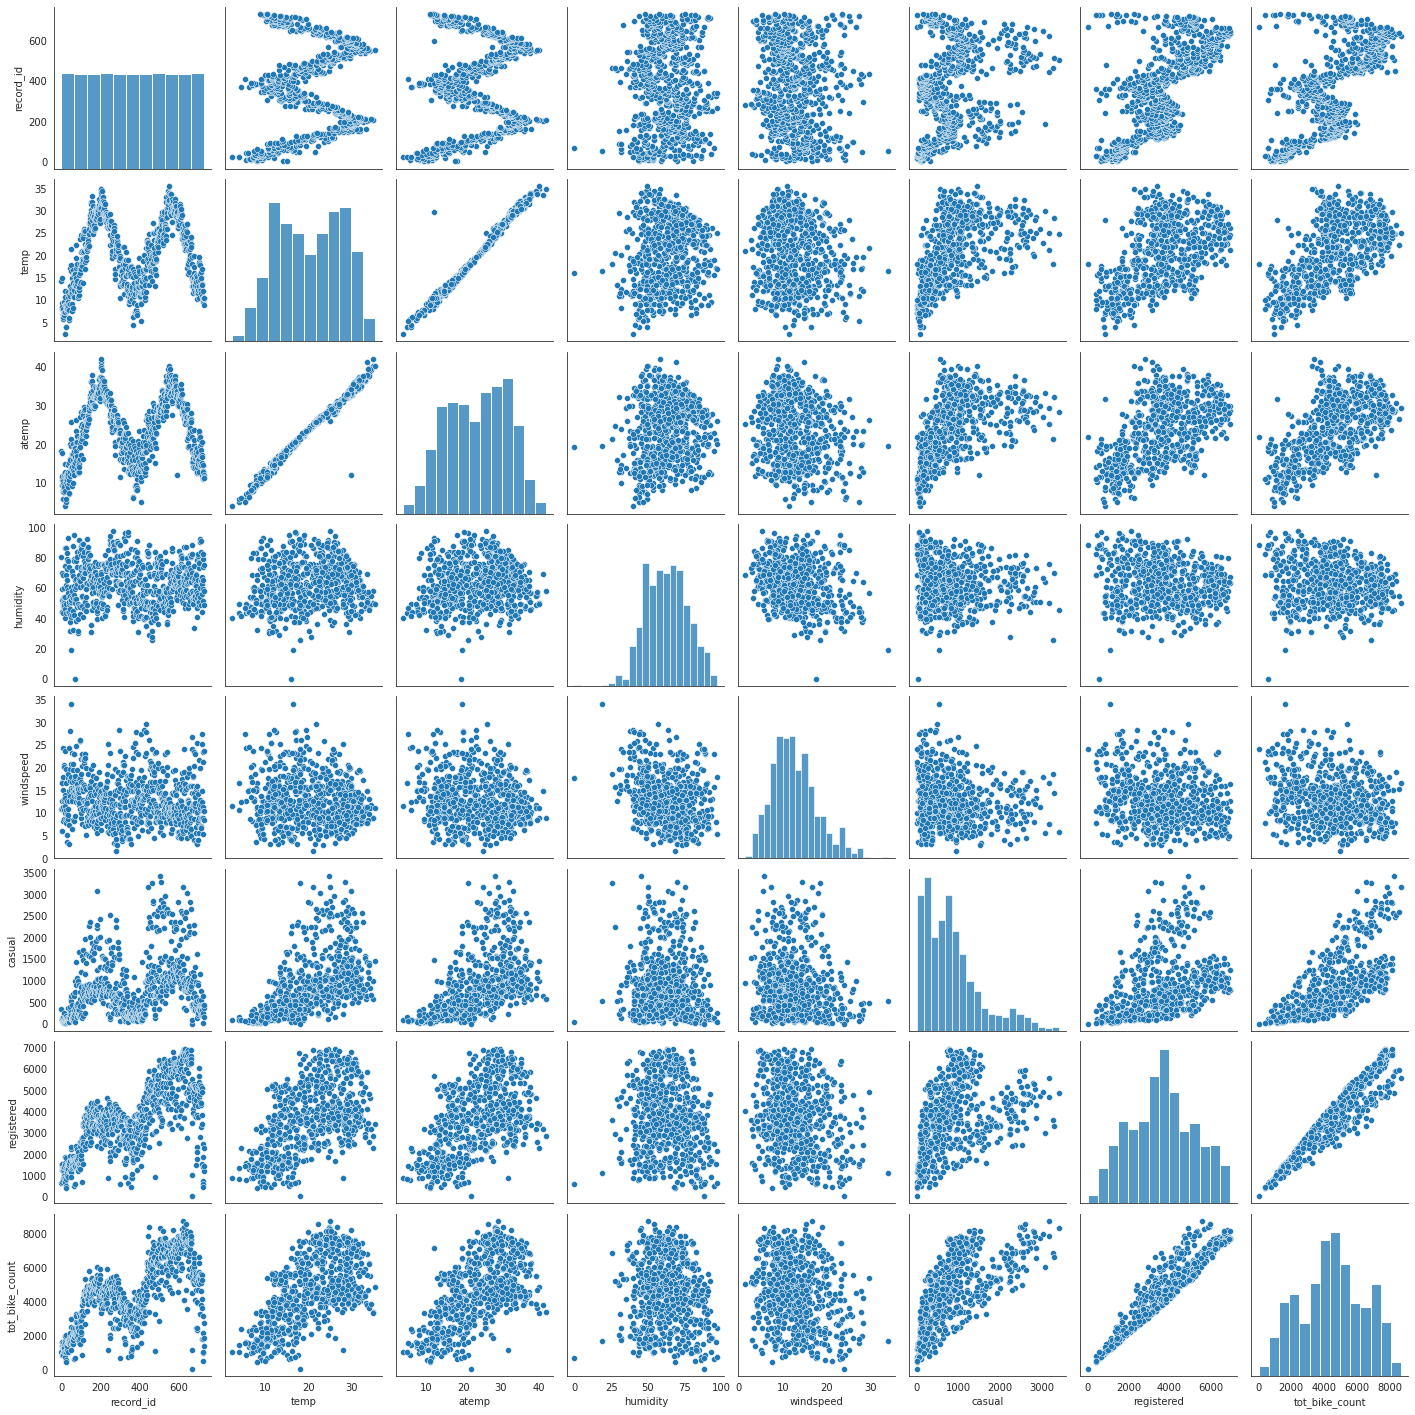

In [1022]:
sns.pairplot(bike_df)

Visualize the Categorical variables

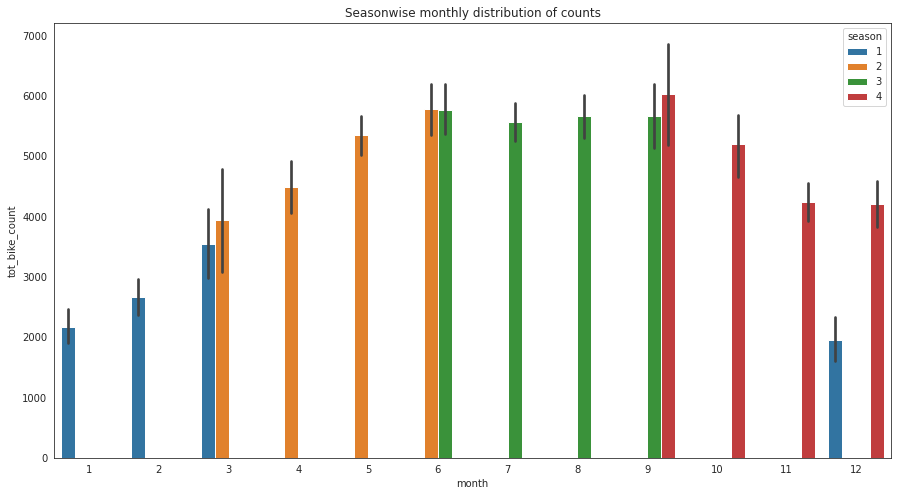

In [1023]:
# plot subplots
figure, ax = plt.subplots(figsize=(15,8))
sns.set_style('white')
#do the bar plot for seasonwise monthly distribution of counts
sns.barplot(x='month', y='tot_bike_count', data=bike_df[['month', 'tot_bike_count', 'season']], hue='season', ax=ax)
ax.set_title('Seasonwise monthly distribution of counts')
plt.show()

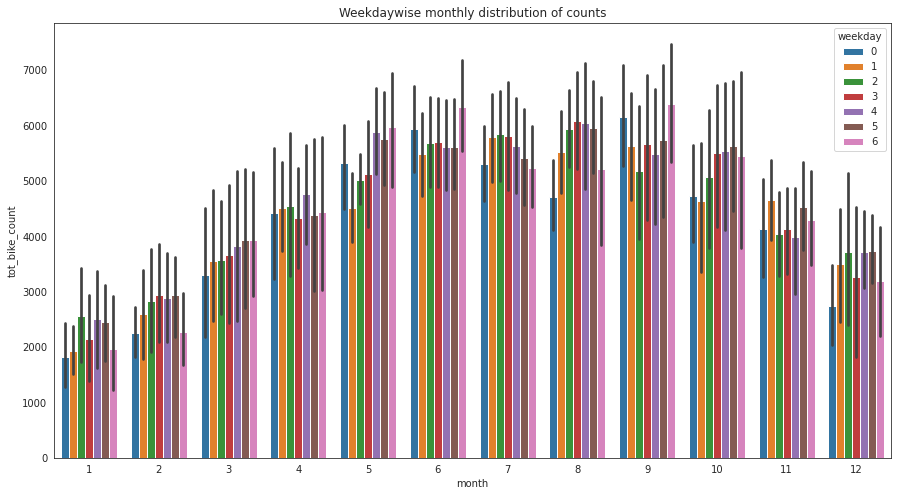

In [1024]:
# bar plot weekdays wise monthly plot
fig, ax1 = plt.subplots(figsize=(15,8))
sns.barplot(x='month', y='tot_bike_count', data=bike_df[['month', 'tot_bike_count', 'weekday']], hue='weekday', ax=ax1)
ax1.set_title('Weekdaywise monthly distribution of counts')
plt.show()

The observation that we can make from above charts is that the bikes rental count is increasing the in seasons spring and summer and the same is decreasing in the fall and winter season. The encoded values for the seasons are
1 - Spring Season
2 - Summer Season
3 - Fall Season
4 - Winter Season

Yearwise distribution of counts

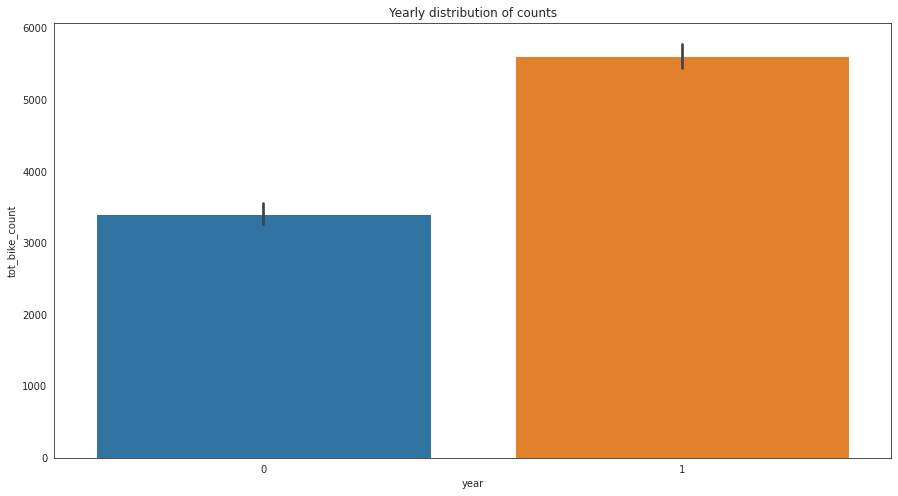

In [1027]:
fig, ax = plt.subplots(figsize=(15, 8))
# voilin plot for the yearly bikes rental count
sns.barplot(x='year', y='tot_bike_count', data = bike_df[['year', 'tot_bike_count']])
ax.set_title('Yearly distribution of counts')
plt.show()

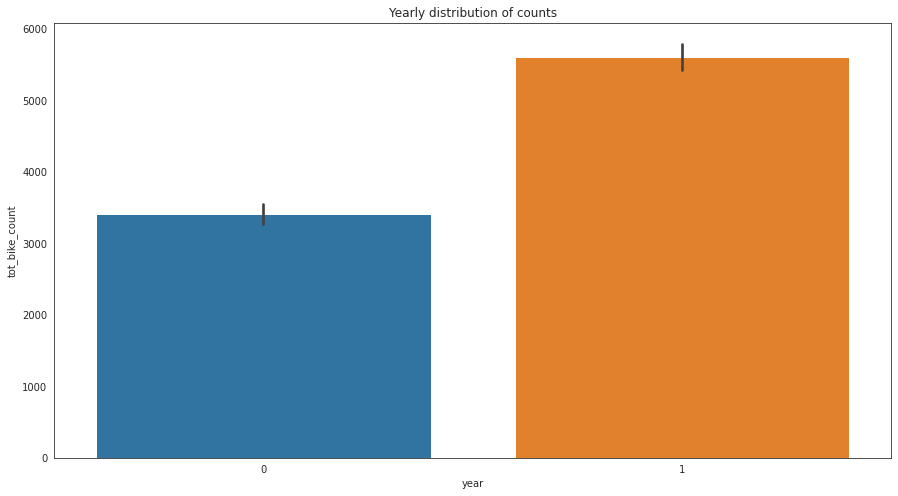

In [832]:
fig, ax = plt.subplots(figsize=(15, 8))
# voilin plot for the yearly bikes rental count
sns.barplot(x='year', y='tot_bike_count', data = bike_df[['year', 'tot_bike_count']])
ax.set_title('Yearly distribution of counts')
plt.show()

Holidaywise distribution of counts

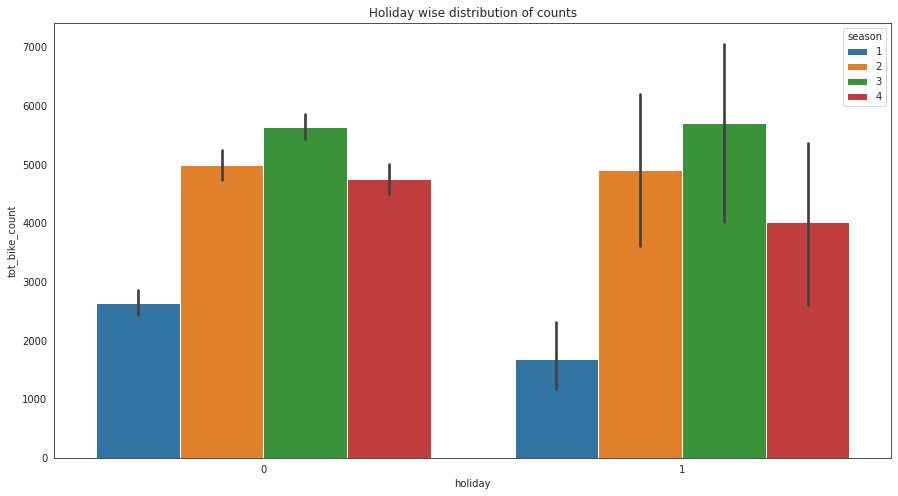

In [1028]:
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(data = bike_df, x='holiday', y='tot_bike_count', hue='season')
ax.set_title('Holiday wise distribution of counts')
plt.show()

The above bar plot shows that bike rental count highest during no holidays compared during the holidays for different seasons

Weekday wise distribution of bike rental counts

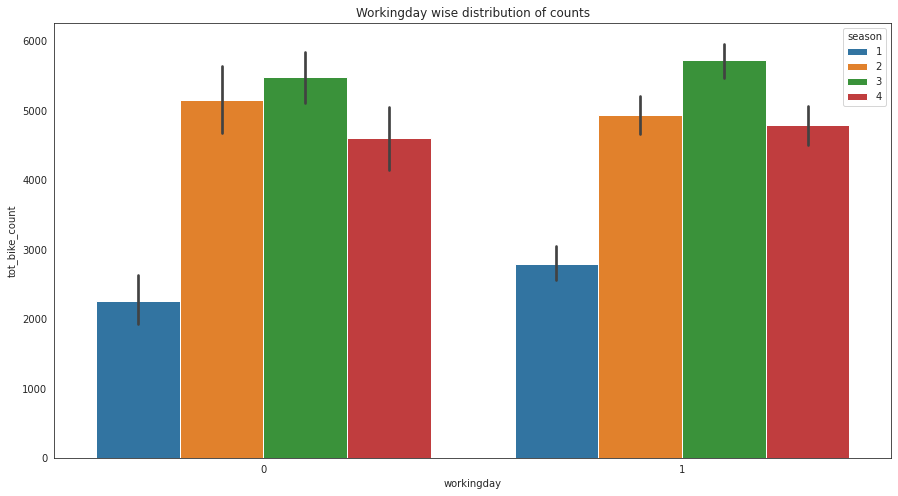

In [1029]:
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(data=bike_df, x='workingday', y='tot_bike_count', hue='season')
ax.set_title('Workingday wise distribution of counts')
plt.show()

The above plot shows that the bike rental count is high during working days than the count in the non-working days seasonwise

# Weatherwise distribution of counts

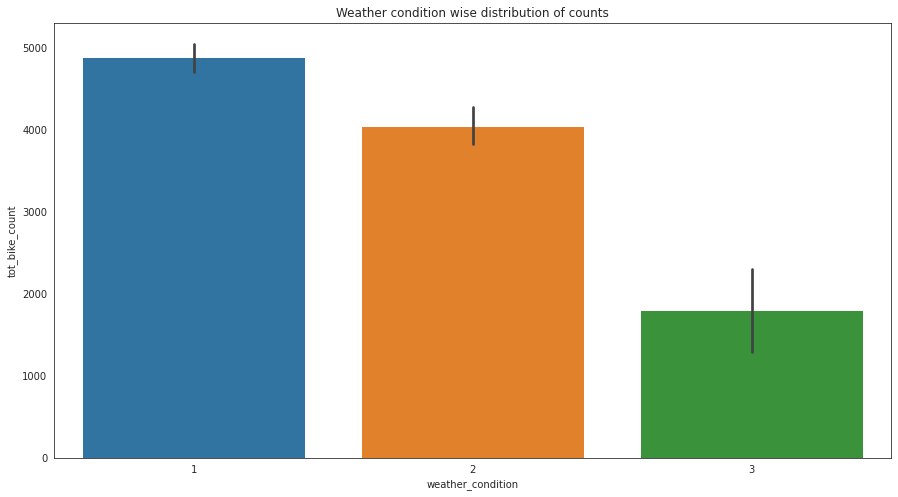

In [1030]:
fig, ax1 = plt.subplots(figsize=(15,8))
sns.barplot(x='weather_condition', y='tot_bike_count', data=bike_df[['month', 'tot_bike_count', 'weather_condition']], ax=ax1)
ax1.set_title('Weather condition wise distribution of counts')
plt.show()


We can observe from the above plot is that count of bike rental is first highest in the weather_condition during clear, partly cloudy. It is second highest during mist cloudy weather and followed by snow and light rain weather.

# Analysis of outliers

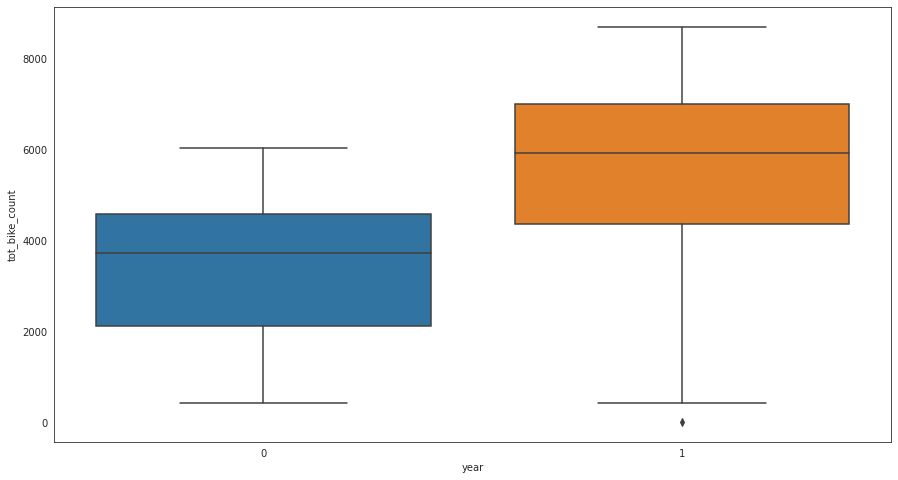

In [1031]:
# plot the total bike rental count and the year using box plot
plt.figure(figsize=(15,8))
sns.boxplot(x='year', y='tot_bike_count', data=bike_df)
ax.set_title('Temperature-Windspeed-Humidity Outliers')
plt.show()

From the above plot it is clear that lower quartile of the total bike rental count in the year corresponding 1 is almost equal to the upper quartile of the same for the year corresponding to 0

Total count outlier

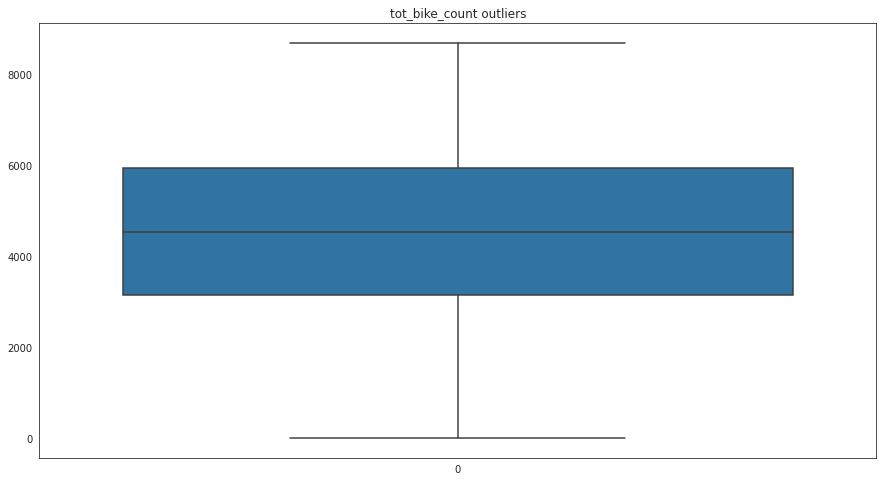

In [1032]:
fig, ax = plt.subplots(figsize=(15,8))
sns.boxplot(data=bike_df['tot_bike_count'])
ax.set_title('tot_bike_count outliers')
plt.show()

From the above box plot we can observe there are no outliers

# Temp_windspeed_humidity outliers

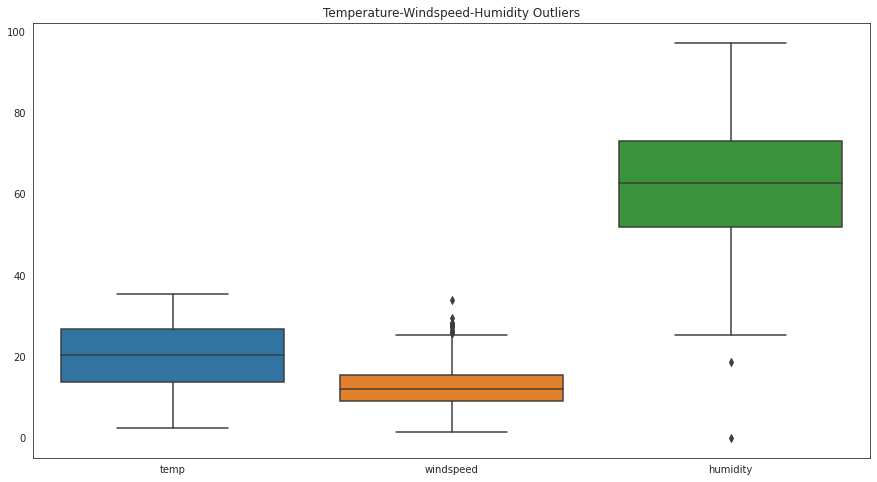

In [1033]:
fig, ax = plt.subplots(figsize=(15,8))
sns.boxplot(data=bike_df[['temp', 'windspeed', 'humidity']])
ax.set_title('Temperature-Windspeed-Humidity Outliers')
plt.show()

We can observe from the above box plots that there are no outliers present in normalized temperature, but there are few outliers present in the windspeed and humidity variable

# Replace the columns with outliers and impute them with right values

In [1034]:
wind_humidity = pd.DataFrame(bike_df, columns=['windspeed', 'humidity'])

In [1036]:
# column names for outliers
colnames = ['windspeed', 'humidity']

In [1037]:
for i in colnames:
  # devide the data into 75 and 25 quartile
  q75, q25 = np.percentile(wind_humidity.loc[:, i], [75, 25])
  # let us find the interquartile range
  inter_qrtl = q75 - q25
  min_val = q25 - (inter_qrtl * 1.5)
  max_val = q75 + (inter_qrtl * 1.5)
  # impute outliers with NA
  #rows_lst = wind_humidity.index[wind_humidity[i] < min].to_list()
  #print(rows_lst)
  wind_humidity.loc[wind_humidity.loc[:,i] < min_val, :i] = np.nan
  wind_humidity.loc[wind_humidity.loc[:,i] > max_val, :i] = np.nan
# Impute the null values with the mean values
wind_humidity['windspeed'] = wind_humidity['windspeed'].fillna(wind_humidity['windspeed'].mean())
wind_humidity['humidity'] = wind_humidity['humidity'].fillna(wind_humidity['humidity'].mean())


# Replace the original data set to imputed data

In [1038]:
# Replacing the imputated windspeed
bike_df['windspeed'] = bike_df['windspeed'].replace(wind_humidity['windspeed'])
bike_df['humidity'] = bike_df['humidity'].replace(wind_humidity['humidity'])
bike_df.head(5)

,record_id,datetime,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,tot_bike_count
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# Normal Probability Plot

Normal probability plot is a graphical technique to identify substantive departures from normality and also it tells about goodness of fit.

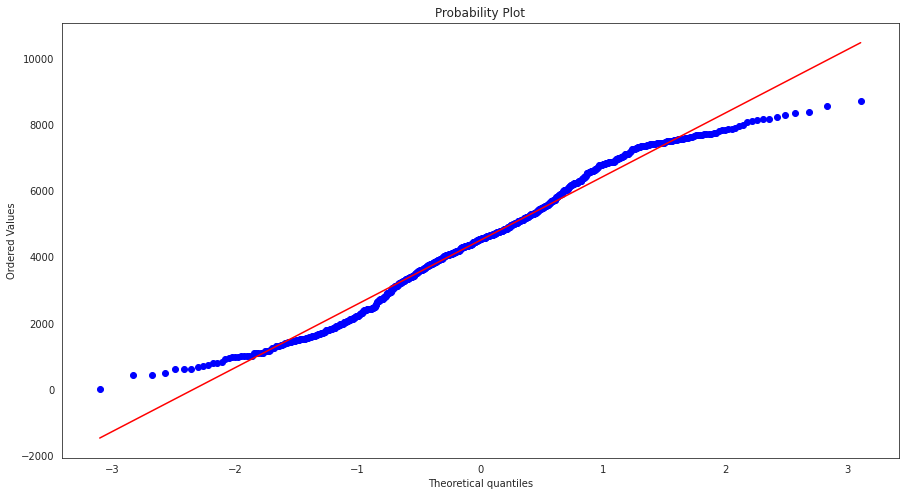

In [1039]:

#Normal plot
fig=plt.figure(figsize=(15,8))
stats.probplot(bike_df.tot_bike_count.tolist(),dist='norm',plot=plt)
plt.show()

From the above plot it is clear that some target variable data points deviates from normality

# Correlation Matrix

Correlation matrix tells about linear relationship between attributes and help us to build better models

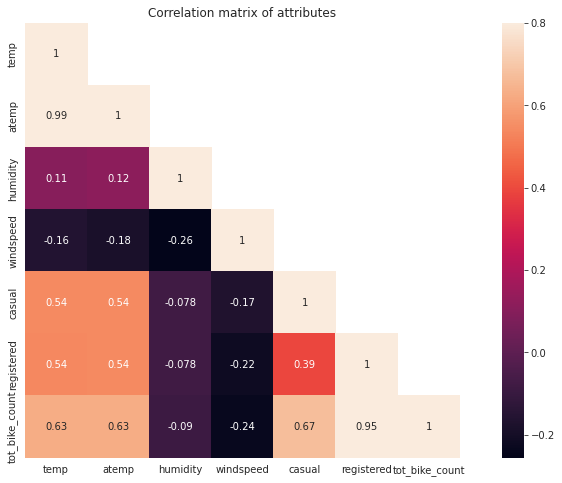

In [1040]:
#Create the correlation matrix
correMtr=bike_df[["temp","atemp","humidity","windspeed","casual","registered","tot_bike_count"]].corr()
mask=np.array(correMtr)
mask[np.tril_indices_from(mask)]=False
#Heat map for correlation matrix of attributes
fig,ax=plt.subplots(figsize=(15,8))
sns.heatmap(correMtr,mask=mask,vmax=0.8,square=True,annot=True,ax=ax)
ax.set_title('Correlation matrix of attributes')
plt.show()

From correlation plot, we can observed that some features are positively correlated or some are negatively correlated to each other. The temp and atemp are highly positively correlated to each other, it means that both are carrying same information.The total_count,casual and registered are highly positively correlated to each other. So, we are going to ignore atemp,casual and registered variable for further analysis.

# Step 2 - Data Preparation

Drop the unwanted variables
Here the columns datetime, record_id, casual and registered are not required

In [1041]:
bike_df.shape

(730, 16)

Drop the unwanted variables
Here the columns datetime, record_id, casual and registered are not required

In [1042]:
bike_df.head()

,record_id,datetime,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,tot_bike_count
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1043]:
# Drop the columns record_id, datetime, casual, registered
bike_df = bike_df.drop(['record_id', 'datetime', 'casual', 'registered'], axis=1)

In [1045]:
bike_df.shape

(730, 12)

Convert the categorical variables to a numerical representation
The variables that need to be converted are
1. season
2. weekday
3. weather_condition


Converting the categorical variable 'season' to numerical representation

The variable season has got 4 levels

1 : spring
2 : summer
3 : fall
4 : winter

In [1046]:
# for the categorical variable season there are 4 levels and hence we require (k-1 which is 4-1 = 3) dummy variables
season_df = pd.get_dummies(bike_df['season'], drop_first=True)
season_df.head()

,2,3,4
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [1048]:
# backup the data frame which will be useful to rollback if in case by mistakenly you currupt the data frame
back_bike_df = bike_df

In [1049]:
# check the size of bike_df before concat
bike_df.shape

(730, 12)

In [1050]:
# concatinate the new data frame season_values with the data frame bike_df
temp_df = pd.concat([bike_df, season_df], axis=1)

In [1051]:
temp_df.shape

(730, 15)

In [1052]:
# it is concatinated properly. Now copy temp_df to bike_df
bike_df = temp_df

In [1055]:
bike_df.shape

(730, 15)

In [1056]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   season             730 non-null    category
 1   year               730 non-null    category
 2   month              730 non-null    category
 3   holiday            730 non-null    category
 4   weekday            730 non-null    category
 5   workingday         730 non-null    category
 6   weather_condition  730 non-null    category
 7   temp               730 non-null    float64 
 8   atemp              730 non-null    float64 
 9   humidity           730 non-null    float64 
 10  windspeed          730 non-null    float64 
 11  tot_bike_count     730 non-null    int64   
 12  2                  730 non-null    uint8   
 13  3                  730 non-null    uint8   
 14  4                  730 non-null    uint8   
dtypes: category(7), float64(4), int64(1), uint8(3)
memory usa

In [1058]:
bike_df[2]=bike_df[2].astype('category')
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   season             730 non-null    category
 1   year               730 non-null    category
 2   month              730 non-null    category
 3   holiday            730 non-null    category
 4   weekday            730 non-null    category
 5   workingday         730 non-null    category
 6   weather_condition  730 non-null    category
 7   temp               730 non-null    float64 
 8   atemp              730 non-null    float64 
 9   humidity           730 non-null    float64 
 10  windspeed          730 non-null    float64 
 11  tot_bike_count     730 non-null    int64   
 12  2                  730 non-null    category
 13  3                  730 non-null    uint8   
 14  4                  730 non-null    uint8   
dtypes: category(8), float64(4), int64(1), uint8(2)
memory usa

In [1059]:
bike_df[3]=bike_df[3].astype('category')

In [1060]:
bike_df[4]=bike_df[4].astype('category')

In [1062]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   season             730 non-null    category
 1   year               730 non-null    category
 2   month              730 non-null    category
 3   holiday            730 non-null    category
 4   weekday            730 non-null    category
 5   workingday         730 non-null    category
 6   weather_condition  730 non-null    category
 7   temp               730 non-null    float64 
 8   atemp              730 non-null    float64 
 9   humidity           730 non-null    float64 
 10  windspeed          730 non-null    float64 
 11  tot_bike_count     730 non-null    int64   
 12  2                  730 non-null    category
 13  3                  730 non-null    category
 14  4                  730 non-null    category
dtypes: category(10), float64(4), int64(1)
memory usage: 37.4 

In [1063]:
# backup the bike_df
temp_df1 = bike_df

In [1064]:
bike_df = bike_df.drop('season', axis=1)

In [1065]:
bike_df.shape

(730, 14)

In [1066]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   year               730 non-null    category
 1   month              730 non-null    category
 2   holiday            730 non-null    category
 3   weekday            730 non-null    category
 4   workingday         730 non-null    category
 5   weather_condition  730 non-null    category
 6   temp               730 non-null    float64 
 7   atemp              730 non-null    float64 
 8   humidity           730 non-null    float64 
 9   windspeed          730 non-null    float64 
 10  tot_bike_count     730 non-null    int64   
 11  2                  730 non-null    category
 12  3                  730 non-null    category
 13  4                  730 non-null    category
dtypes: category(9), float64(4), int64(1)
memory usage: 36.5 KB


In [1067]:
bike_df.head()

,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,tot_bike_count,2,3,4
0,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0,0,0
1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,0,0,0
2,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0
3,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0
4,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0


In [1071]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   year               730 non-null    category
 1   month              730 non-null    category
 2   holiday            730 non-null    category
 3   weekday            730 non-null    category
 4   workingday         730 non-null    category
 5   weather_condition  730 non-null    category
 6   temp               730 non-null    float64 
 7   atemp              730 non-null    float64 
 8   humidity           730 non-null    float64 
 9   windspeed          730 non-null    float64 
 10  tot_bike_count     730 non-null    int64   
 11  summer             730 non-null    category
 12  fall               730 non-null    category
 13  winter             730 non-null    category
dtypes: category(9), float64(4), int64(1)
memory usage: 36.5 KB


In [1072]:
bike_df.rename(columns = {2:'summer', 3:'fall', 4:'winter'}, inplace=True)

In [1073]:
bike_df.head()

,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,tot_bike_count,summer,fall,winter
0,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0,0,0
1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,0,0,0
2,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0
3,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0
4,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0


In [1074]:
# perform the categorical values conversion to numerical one for the variable weather_condition
weather_cond_df = pd.get_dummies(temp_df['weather_condition'])
weather_cond_df.head()

,1,2,3
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


In [1075]:
bike_df.shape

(730, 14)

In [1076]:
temp_df = pd.concat([bike_df, weather_cond_df], axis=1)

In [1077]:
temp_df.shape

(730, 17)

In [1078]:
bike_df = temp_df

In [1079]:
bike_df.shape

(730, 17)

In [1080]:
bike_df.rename(columns={1:'Clear', 2:'Mist_Cloudy', 3:'Light_Snow_Rain'}, inplace=True)

In [1081]:
bike_df.head()

,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,tot_bike_count,summer,fall,winter,Clear,Mist_Cloudy,Light_Snow_Rain
0,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0,0,0,0,1,0
1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,0,0,0,0,1,0
2,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,1,0,0
3,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,1,0,0
4,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,1,0,0


In [1082]:
bike_df.shape

(730, 17)

In [1083]:
temp_df = bike_df

In [1084]:
bike_df = bike_df.drop('weather_condition', axis=1)

In [1085]:
bike_df.shape

(730, 16)

In [1086]:
working_day_df = pd.get_dummies(temp_df['weekday'], drop_first=True)
working_day_df.head()

,1,2,3,4,5,6
0,0,0,0,0,0,1
1,0,0,0,0,0,0
2,1,0,0,0,0,0
3,0,1,0,0,0,0
4,0,0,1,0,0,0


In [1087]:
bike_df.shape

(730, 16)

In [1090]:
bike_df = pd.concat([bike_df, working_day_df], axis=1)
bike_df.head()

,year,month,holiday,weekday,workingday,temp,atemp,humidity,windspeed,tot_bike_count,summer,fall,winter,Clear,Mist_Cloudy,Light_Snow_Rain,1,2,3,4,5,6
0,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,0,0,0,0,1,0,0,0,0,0,0,1
1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,0,0,1,0,0,0,0,0,0,0
2,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,1,0,0,1,0,0,0,0,0
3,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,1,0,0,0,1,0,0,0,0
4,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,1,0,0,0,0,1,0,0,0


In [1091]:
bike_df.shape

(730, 22)

In [1092]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   year             730 non-null    category
 1   month            730 non-null    category
 2   holiday          730 non-null    category
 3   weekday          730 non-null    category
 4   workingday       730 non-null    category
 5   temp             730 non-null    float64 
 6   atemp            730 non-null    float64 
 7   humidity         730 non-null    float64 
 8   windspeed        730 non-null    float64 
 9   tot_bike_count   730 non-null    int64   
 10  summer           730 non-null    category
 11  fall             730 non-null    category
 12  winter           730 non-null    category
 13  Clear            730 non-null    uint8   
 14  Mist_Cloudy      730 non-null    uint8   
 15  Light_Snow_Rain  730 non-null    uint8   
 16  1                730 non-null    uint8   
 1

In [900]:
temp_df[1] = temp_df[1].astype('category')

In [1093]:
bike_df[2] = bike_df[2].astype('category')
bike_df[3] = bike_df[3].astype('category')
bike_df[4] = bike_df[4].astype('category')
bike_df[5] = bike_df[5].astype('category')
bike_df[6] = bike_df[6].astype('category')

In [1094]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   year             730 non-null    category
 1   month            730 non-null    category
 2   holiday          730 non-null    category
 3   weekday          730 non-null    category
 4   workingday       730 non-null    category
 5   temp             730 non-null    float64 
 6   atemp            730 non-null    float64 
 7   humidity         730 non-null    float64 
 8   windspeed        730 non-null    float64 
 9   tot_bike_count   730 non-null    int64   
 10  summer           730 non-null    category
 11  fall             730 non-null    category
 12  winter           730 non-null    category
 13  Clear            730 non-null    uint8   
 14  Mist_Cloudy      730 non-null    uint8   
 15  Light_Snow_Rain  730 non-null    uint8   
 16  1                730 non-null    uint8   
 1

In [1095]:
temp_df = bike_df

In [1096]:
bike_df.rename(columns={1:'Monday', 2:'Tuesday', 3:'Wensday', 4:'Thursday', 5:'Friday', 6:'Saturday'}, inplace=True)
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   year             730 non-null    category
 1   month            730 non-null    category
 2   holiday          730 non-null    category
 3   weekday          730 non-null    category
 4   workingday       730 non-null    category
 5   temp             730 non-null    float64 
 6   atemp            730 non-null    float64 
 7   humidity         730 non-null    float64 
 8   windspeed        730 non-null    float64 
 9   tot_bike_count   730 non-null    int64   
 10  summer           730 non-null    category
 11  fall             730 non-null    category
 12  winter           730 non-null    category
 13  Clear            730 non-null    uint8   
 14  Mist_Cloudy      730 non-null    uint8   
 15  Light_Snow_Rain  730 non-null    uint8   
 16  Monday           730 non-null    uint8   
 1

In [1097]:
bike_df = bike_df.drop('weekday', axis=1)
bike_df.head()

,year,month,holiday,workingday,temp,atemp,humidity,windspeed,tot_bike_count,summer,fall,winter,Clear,Mist_Cloudy,Light_Snow_Rain,Monday,Tuesday,Wensday,Thursday,Friday,Saturday
0,0,1,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,0,0,1,0,0,0,0,0,0,1
1,0,1,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,0,0,1,0,0,0,0,0,0,0
2,0,1,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,1,0,0,1,0,0,0,0,0
3,0,1,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,1,0,0,0,1,0,0,0,0
4,0,1,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,1,0,0,0,0,1,0,0,0


In [1098]:
bike_df.shape

(730, 21)

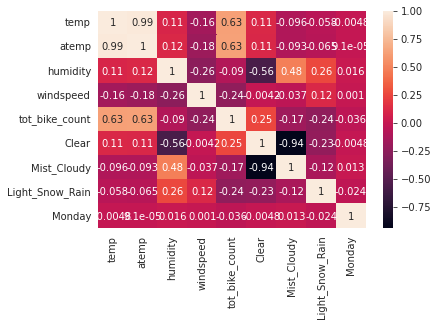

In [1100]:
sns.heatmap(bike_df.corr(), annot=True)

# Split the data set into train and test data and Rescaling of variables

In [1101]:
df_train, df_test = train_test_split(bike_df, train_size=0.7, random_state=100)

In [1102]:
df_train.shape

(510, 21)

In [1103]:
df_test.shape

(220, 21)

# Rescale the features
Two types of rescaling
1. Min-Max Scaling
2. Standerdization(min=0, sigma=1)

We will use the Min-Max scaling as it scales the features between 0 and 1

In [1104]:
# Instantiate the object
scaler = MinMaxScaler()

In [1105]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   year             730 non-null    category
 1   month            730 non-null    category
 2   holiday          730 non-null    category
 3   workingday       730 non-null    category
 4   temp             730 non-null    float64 
 5   atemp            730 non-null    float64 
 6   humidity         730 non-null    float64 
 7   windspeed        730 non-null    float64 
 8   tot_bike_count   730 non-null    int64   
 9   summer           730 non-null    category
 10  fall             730 non-null    category
 11  winter           730 non-null    category
 12  Clear            730 non-null    uint8   
 13  Mist_Cloudy      730 non-null    uint8   
 14  Light_Snow_Rain  730 non-null    uint8   
 15  Monday           730 non-null    uint8   
 16  Tuesday          730 non-null    category
 1

In [1106]:
bike_df['Clear'] = bike_df['Clear'].astype('category')

In [1107]:
bike_df['Mist_Cloudy'] = bike_df['Mist_Cloudy'].astype('category')

In [1108]:
bike_df['Light_Snow_Rain'] = bike_df['Light_Snow_Rain'].astype('category')

In [1111]:
bike_df['Monday'] = bike_df['Monday'].astype('category')

In [1112]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   year             730 non-null    category
 1   month            730 non-null    category
 2   holiday          730 non-null    category
 3   workingday       730 non-null    category
 4   temp             730 non-null    float64 
 5   atemp            730 non-null    float64 
 6   humidity         730 non-null    float64 
 7   windspeed        730 non-null    float64 
 8   tot_bike_count   730 non-null    int64   
 9   summer           730 non-null    category
 10  fall             730 non-null    category
 11  winter           730 non-null    category
 12  Clear            730 non-null    category
 13  Mist_Cloudy      730 non-null    category
 14  Light_Snow_Rain  730 non-null    category
 15  Monday           730 non-null    category
 16  Tuesday          730 non-null    category
 1

In [1113]:
# fit on the data
# scale only numerical variables
numeric_vars = ['temp', 'atemp', 'humidity', 'windspeed', 'tot_bike_count']

In [1114]:
df_train[numeric_vars] = scaler.fit_transform(df_train[numeric_vars])

In [1115]:
df_train.head()

,year,month,holiday,workingday,temp,atemp,humidity,windspeed,tot_bike_count,summer,fall,winter,Clear,Mist_Cloudy,Light_Snow_Rain,Monday,Tuesday,Wensday,Thursday,Friday,Saturday
576,1,7,0,1,0.815169,0.766351,0.659744,0.264686,0.827658,0,1,0,1,0,0,0,1,0,0,0,0
426,1,3,0,0,0.442393,0.438975,0.553780,0.255342,0.465255,0,0,0,0,1,0,0,0,0,0,0,1
728,1,12,0,0,0.245101,0.200348,0.377528,0.663106,0.204096,0,0,0,1,0,0,0,0,0,0,0,0
482,1,4,0,0,0.395666,0.391735,0.385516,0.188475,0.482973,1,0,0,0,1,0,0,0,0,0,0,1
111,0,4,0,1,0.345824,0.318819,0.692225,0.380981,0.191095,1,0,0,0,1,0,0,0,0,0,1,0


In [1116]:
df_train.describe()

,temp,atemp,humidity,windspeed,tot_bike_count,Clear,Mist_Cloudy,Light_Snow_Rain,Monday
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.513156,0.562792,0.320883,0.513499,0.625490,0.345098,0.029412,0.150980
std,0.225858,0.212410,0.175815,0.169803,0.224421,0.484471,0.475867,0.169124,0.358381
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.428913,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000
50%,0.542596,0.529718,0.568956,0.296763,0.518638,1.000000,0.000000,0.000000,0.000000
75%,0.735215,0.688457,0.691560,0.414447,0.684710,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Training the model

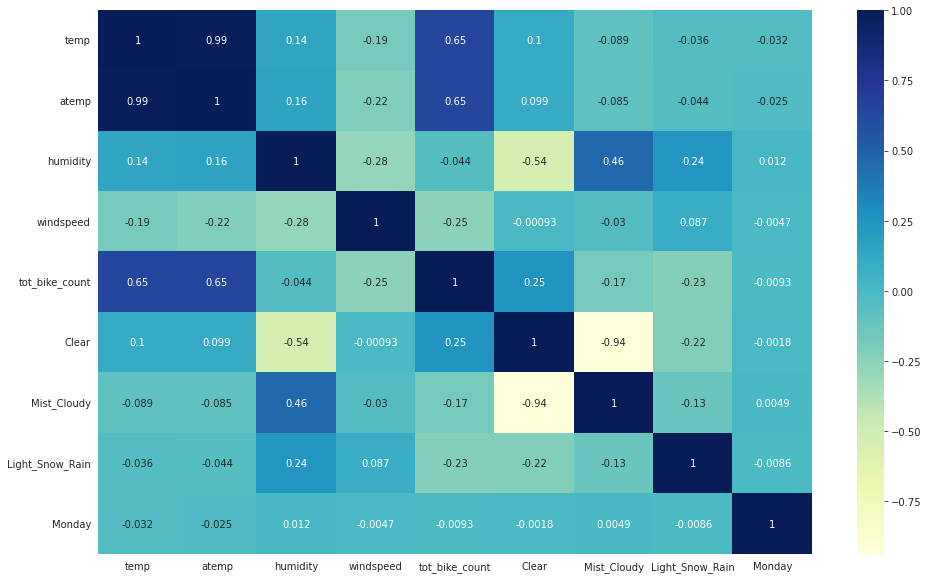

In [1117]:
# draw the heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(df_train.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [1118]:
df_train.head()

,year,month,holiday,workingday,temp,atemp,humidity,windspeed,tot_bike_count,summer,fall,winter,Clear,Mist_Cloudy,Light_Snow_Rain,Monday,Tuesday,Wensday,Thursday,Friday,Saturday
576,1,7,0,1,0.815169,0.766351,0.659744,0.264686,0.827658,0,1,0,1,0,0,0,1,0,0,0,0
426,1,3,0,0,0.442393,0.438975,0.553780,0.255342,0.465255,0,0,0,0,1,0,0,0,0,0,0,1
728,1,12,0,0,0.245101,0.200348,0.377528,0.663106,0.204096,0,0,0,1,0,0,0,0,0,0,0,0
482,1,4,0,0,0.395666,0.391735,0.385516,0.188475,0.482973,1,0,0,0,1,0,0,0,0,0,0,1
111,0,4,0,1,0.345824,0.318819,0.692225,0.380981,0.191095,1,0,0,0,1,0,0,0,0,0,1,0


In [1119]:
# X_train, y_train
back_df_train = df_train
y_train = df_train.pop('tot_bike_count')
X_train = df_train

In [1120]:
X_train.head()

,year,month,holiday,workingday,temp,atemp,humidity,windspeed,summer,fall,winter,Clear,Mist_Cloudy,Light_Snow_Rain,Monday,Tuesday,Wensday,Thursday,Friday,Saturday
576,1,7,0,1,0.815169,0.766351,0.659744,0.264686,0,1,0,1,0,0,0,1,0,0,0,0
426,1,3,0,0,0.442393,0.438975,0.553780,0.255342,0,0,0,0,1,0,0,0,0,0,0,1
728,1,12,0,0,0.245101,0.200348,0.377528,0.663106,0,0,0,1,0,0,0,0,0,0,0,0
482,1,4,0,0,0.395666,0.391735,0.385516,0.188475,1,0,0,0,1,0,0,0,0,0,0,1
111,0,4,0,1,0.345824,0.318819,0.692225,0.380981,1,0,0,0,1,0,0,0,0,0,1,0


In [1121]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: tot_bike_count, dtype: float64

In [1122]:
# Approach towards building the model
# First start with basic model with only predictor variable
X_train_sm = sm.add_constant(X_train['temp'])
X_train_sm.shape

(510, 2)

In [1123]:
lr = sm.OLS(y_train, X_train_sm)

In [1124]:
lr_model = lr.fit()

In [1125]:
lr_model.params

const    0.169031
temp     0.640944
dtype: float64

In [1126]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         tot_bike_count   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     362.0
Date:                Wed, 12 Jan 2022   Prob (F-statistic):           2.46e-61
Time:                        17:43:06   Log-Likelihood:                 176.09
No. Observations:                 510   AIC:                            -348.2
Df Residuals:                     508   BIC:                            -339.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1690      0.020      8.608      0.000       0.130       0.208
temp           0.6409      0.034     19.026      0.000       0.575       0.707
==============================================================================
Omnibus:                        6.355   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                4.521
Skew:                           0.088   Prob(JB):                        0.104
Kurtosis:                       2.574   Cond. No.                         5.76
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1127]:
X_train_sm = X_train[['temp', 'humidity']]


In [1128]:
X_train_sm = sm.add_constant(X_train_sm)

In [1130]:
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()

In [1131]:
lr_model.params

const       0.258180
temp        0.660582
humidity   -0.177158
dtype: float64

In [1132]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         tot_bike_count   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     195.1
Date:                Wed, 12 Jan 2022   Prob (F-statistic):           1.42e-63
Time:                        17:43:41   Log-Likelihood:                 184.47
No. Observations:                 510   AIC:                            -362.9
Df Residuals:                     507   BIC:                            -350.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2582      0.029      8.891      0.000       0.201       0.315
temp           0.6606      0.034     19.711      0.000       0.595       0.726
humidity      -0.1772      0.043     -4.115      0.000      -0.262      -0.093
==============================================================================
Omnibus:                        4.452   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.108   Jarque-Bera (JB):                3.428
Skew:                           0.074   Prob(JB):                        0.180
Kurtosis:                       2.627   Cond. No.                         8.36
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1133]:
X_train_sm = sm.add_constant(X_train)

In [1134]:
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()

In [1135]:
lr_model.params

const              0.014833
year               0.233491
month              0.001123
holiday           -0.038536
workingday         0.045797
temp               0.436604
atemp              0.049659
humidity          -0.072001
windspeed         -0.172163
summer             0.117072
fall               0.071782
winter             0.152371
Clear              0.112937
Mist_Cloudy        0.049052
Light_Snow_Rain   -0.147155
Monday            -0.011027
Tuesday           -0.006598
Wensday            0.007599
Thursday           0.004956
Friday             0.012331
Saturday           0.056844
dtype: float64

In [1136]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         tot_bike_count   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     135.0
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          6.82e-177
Time:                        17:44:32   Log-Likelihood:                 493.58
No. Observations:                 510   AIC:                            -949.2
Df Residuals:                     491   BIC:                            -868.7
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0148      0.023      0.647      0.518      -0.030       0.060
year                0.2335      0.008     27.664      0.000       0.217       0.250
month               0.0011      0.002      0.475      0.635      -0.004       0.006
holiday            -0.0385      0.025     -1.568      0.118      -0.087       0.010
workingday          0.0458      0.010      4.650      0.000       0.026       0.065
temp                0.4366      0.141      3.101      0.002       0.160       0.713
atemp               0.0497      0.144      0.345      0.730      -0.233       0.332
humidity           -0.0720      0.032     -2.253      0.025      -0.135      -0.009
windspeed          -0.1722      0.027     -6.270      0.000      -0.226      -0.118
summer              0.1171      0.016      7.430      0.000       0.086       0.148
fall                0.0718      0.023      3.076      0.002       0.026       0.118
winter              0.1524      0.022      6.811      0.000       0.108       0.196
Clear               0.1129      0.009     12.492      0.000       0.095       0.131
Mist_Cloudy         0.0491      0.011      4.438      0.000       0.027       0.071
Light_Snow_Rain    -0.1472      0.022     -6.630      0.000      -0.191      -0.104
Monday             -0.0110      0.010     -1.073      0.284      -0.031       0.009
Tuesday            -0.0066      0.012     -0.562      0.574      -0.030       0.016
Wensday             0.0076      0.011      0.687      0.492      -0.014       0.029
Thursday            0.0050      0.011      0.434      0.665      -0.017       0.027
Friday              0.0123      0.012      1.041      0.298      -0.011       0.036
Saturday            0.0568      0.015      3.711      0.000       0.027       0.087
==============================================================================
Omnibus:                       76.085   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              193.962
Skew:                          -0.754   Prob(JB):                     7.61e-43
Kurtosis:                       5.618   Cond. No.                     4.94e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.21e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [1137]:

# Create a data frame that will contain names of all the feature variables and their respective VIF values
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
16,Wensday,inf
2,holiday,inf
3,workingday,inf
15,Tuesday,inf
18,Friday,inf
17,Thursday,inf
14,Monday,inf
4,temp,58.64
5,atemp,54.07
11,Clear,24.46


We can observe that the dummy variables Monday to Friday, temp, atemp, Clear, Mist_Cloudy, falld, winter have high VIF values (>5)

In [1138]:
# Drop the features that have got high p-value and high VIF > 5
X = X_train.drop(['atemp', 'Monday', 'Tuesday', 'Wensday', 'Thursday', 'Friday'], axis=1)

In [1140]:
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()

In [1141]:
lr_model.params

const              0.016991
year               0.232766
month              0.001346
holiday           -0.045820
workingday         0.047237
temp               0.485181
humidity          -0.074675
windspeed         -0.175172
summer             0.115778
fall               0.069181
winter             0.149932
Clear              0.112969
Mist_Cloudy        0.049945
Light_Snow_Rain   -0.145923
Saturday           0.056584
dtype: float64

In [1142]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         tot_bike_count   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     187.4
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          8.45e-182
Time:                        17:48:51   Log-Likelihood:                 491.99
No. Observations:                 510   AIC:                            -956.0
Df Residuals:                     496   BIC:                            -896.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0170      0.023      0.745      0.457      -0.028       0.062
year                0.2328      0.008     27.691      0.000       0.216       0.249
month               0.0013      0.002      0.571      0.568      -0.003       0.006
holiday            -0.0458      0.028     -1.621      0.106      -0.101       0.010
workingday          0.0472      0.012      3.897      0.000       0.023       0.071
temp                0.4852      0.034     14.129      0.000       0.418       0.553
humidity           -0.0747      0.032     -2.349      0.019      -0.137      -0.012
windspeed          -0.1752      0.027     -6.522      0.000      -0.228      -0.122
summer              0.1158      0.016      7.372      0.000       0.085       0.147
fall                0.0692      0.023      2.993      0.003       0.024       0.115
winter              0.1499      0.022      6.737      0.000       0.106       0.194
Clear               0.1130      0.009     12.630      0.000       0.095       0.131
Mist_Cloudy         0.0499      0.011      4.574      0.000       0.028       0.071
Light_Snow_Rain    -0.1459      0.022     -6.622      0.000      -0.189      -0.103
Saturday            0.0566      0.015      3.701      0.000       0.027       0.087
==============================================================================
Omnibus:                       73.641   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.169
Skew:                          -0.725   Prob(JB):                     3.08e-42
Kurtosis:                       5.626   Cond. No.                     6.43e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.08e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [1143]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
10,Clear,24.24
11,Mist_Cloudy,18.00
8,fall,6.04
9,winter,5.37
1,month,3.88
4,temp,3.50
12,Light_Snow_Rain,2.97
7,summer,2.68
3,workingday,1.88
5,humidity,1.82


In [1170]:
#drop the variables that high VIF. These are winter, fall and Mist_Cloudy
#X1 = X.drop(['winter', 'fall', 'Mist_Cloudy'], axis=1)
#X1 = X.drop(['month', 'holiday', 'Clear', 'Mist_Cloudy'], axis=1)
#X1 = X.drop(['month', 'holiday', 'Clear', 'Mist_Cloudy', 'temp'], axis=1)
X1 = X.drop(['month', 'Clear', 'Mist_Cloudy', 'humidity', 'holiday', 'fall'], axis=1)
#X1 = X.drop(['month'], axis=1)

In [1171]:
X1.columns

Index(['year', 'workingday', 'temp', 'windspeed', 'summer', 'winter',
       'Light_Snow_Rain', 'Saturday'],
      dtype='object')

In [1172]:
X_train_sm = sm.add_constant(X1)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()

In [1173]:
lr_model.params

const              0.043322
year               0.233009
workingday         0.049434
temp               0.592268
windspeed         -0.156571
summer             0.070587
winter             0.124611
Light_Snow_Rain   -0.250830
Saturday           0.061263
dtype: float64

In [1174]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         tot_bike_count   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     247.1
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          1.75e-168
Time:                        17:57:41   Log-Likelihood:                 446.50
No. Observations:                 510   AIC:                            -875.0
Df Residuals:                     501   BIC:                            -836.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0433      0.020      2.146      0.032       0.004       0.083
year                0.2330      0.009     25.647      0.000       0.215       0.251
workingday          0.0494      0.012      4.013      0.000       0.025       0.074
temp                0.5923      0.021     27.903      0.000       0.551       0.634
windspeed          -0.1566      0.028     -5.669      0.000      -0.211      -0.102
summer              0.0706      0.011      6.340      0.000       0.049       0.092
winter              0.1246      0.011     10.886      0.000       0.102       0.147
Light_Snow_Rain    -0.2508      0.027     -9.267      0.000      -0.304      -0.198
Saturday            0.0613      0.016      3.858      0.000       0.030       0.092
==============================================================================
Omnibus:                       60.342   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              120.770
Skew:                          -0.683   Prob(JB):                     5.96e-27
Kurtosis:                       4.954   Cond. No.                         11.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1175]:
vif = pd.DataFrame()
vif['Features'] = X1.columns
vif['VIF'] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
2,temp,4.41
1,workingday,3.90
3,windspeed,3.39
0,year,2.02
7,Saturday,1.66
4,summer,1.50
5,winter,1.38
6,Light_Snow_Rain,1.06


In [1176]:
cols_to_drop = ['atemp', 'Monday', 'Tuesday', 'Wensday', 'Thursday', 'Friday', 'month', 'Clear', 'Mist_Cloudy', 'humidity', 'holiday', 'fall']

In [1177]:
cols_to_drop

['atemp',
 'Monday',
 'Tuesday',
 'Wensday',
 'Thursday',
 'Friday',
 'month',
 'Clear',
 'Mist_Cloudy',
 'humidity',
 'holiday',
 'fall']

# Residual Analysis

In [1178]:
y_train_pred = lr_model.predict(X_train_sm)
y_train_pred

576    0.767121
426    0.559630
728    0.317674
482    0.613011
111    0.308512
         ...   
578    0.808168
53     0.195321
350    0.308596
79     0.354399
520    0.695543
Length: 510, dtype: float64

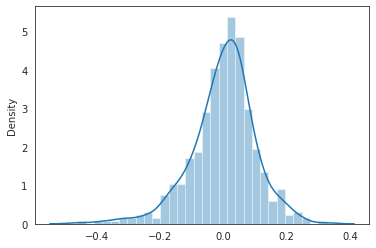

In [1179]:
residual = y_train - y_train_pred
sns.distplot(residual)

# Predictions and Evaluation on the test data

In [1180]:
#create a list of numeric variables

numeric_vars = ['temp', 'atemp', 'humidity', 'windspeed', 'tot_bike_count']

In [1181]:
df_test_back = df_test

In [1182]:
df_test.head()

,year,month,holiday,workingday,temp,atemp,humidity,windspeed,tot_bike_count,summer,fall,winter,Clear,Mist_Cloudy,Light_Snow_Rain,Monday,Tuesday,Wensday,Thursday,Friday,Saturday
184,0,7,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,1,0,0,1,0,1,0,0,0,0,0
535,1,6,0,1,32.082500,36.04875,59.2083,7.625404,6211,1,0,0,1,0,0,0,0,1,0,0,0
299,0,10,0,1,19.270000,22.85230,81.2917,13.250121,2659,0,0,1,0,1,0,0,0,0,1,0,0
221,0,8,0,1,31.433347,34.24915,42.4167,13.417286,4780,0,1,0,1,0,0,0,0,1,0,0,0
152,0,6,0,1,29.315000,32.19710,30.5000,19.583229,4968,1,0,0,1,0,0,0,0,0,1,0,0


In [1183]:
# fit on the data

df_test[numeric_vars] = scaler.transform(df_test[numeric_vars])
df_test.head()

,year,month,holiday,workingday,temp,atemp,humidity,windspeed,tot_bike_count,summer,fall,winter,Clear,Mist_Cloudy,Light_Snow_Rain,Monday,Tuesday,Wensday,Thursday,Friday,Saturday
184,0,7,1,0,0.831783,0.769660,0.575080,0.084219,0.692706,0,1,0,0,1,0,1,0,0,0,0,0
535,1,6,0,1,0.901354,0.842587,0.516506,0.153728,0.712034,1,0,0,1,0,0,0,0,1,0,0,0
299,0,10,0,1,0.511964,0.496145,0.798722,0.334206,0.303382,0,0,1,0,1,0,0,0,0,1,0,0
221,0,8,0,1,0.881625,0.795343,0.301917,0.339570,0.547400,0,1,0,1,0,0,0,0,1,0,0,0
152,0,6,0,1,0.817246,0.741471,0.149627,0.537414,0.569029,1,0,0,1,0,0,0,0,0,1,0,0


In [1184]:
df_test.describe()

,temp,atemp,humidity,windspeed,tot_bike_count,Clear,Mist_Cloudy,Light_Snow_Rain,Monday
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.558718,0.532847,0.555575,0.313293,0.522154,0.654545,0.318182,0.027273,0.127273
std,0.233187,0.217401,0.184252,0.159584,0.219163,0.476601,0.466833,0.163248,0.334038
min,0.046591,0.025950,0.084665,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000
25%,0.355429,0.344870,0.416134,0.198843,0.378595,0.000000,0.000000,0.000000,0.000000
50%,0.558172,0.544652,0.546511,0.300126,0.524678,1.000000,0.000000,0.000000,0.000000
75%,0.755981,0.713308,0.682994,0.402718,0.677750,1.000000,1.000000,0.000000,0.000000
max,0.984424,0.980934,1.002662,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000


In [1185]:
y_test = df_test.pop('tot_bike_count')
X_test = df_test

In [1186]:
y_test.head()

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: tot_bike_count, dtype: float64

In [1187]:
X_test.head()

,year,month,holiday,workingday,temp,atemp,humidity,windspeed,summer,fall,winter,Clear,Mist_Cloudy,Light_Snow_Rain,Monday,Tuesday,Wensday,Thursday,Friday,Saturday
184,0,7,1,0,0.831783,0.769660,0.575080,0.084219,0,1,0,0,1,0,1,0,0,0,0,0
535,1,6,0,1,0.901354,0.842587,0.516506,0.153728,1,0,0,1,0,0,0,0,1,0,0,0
299,0,10,0,1,0.511964,0.496145,0.798722,0.334206,0,0,1,0,1,0,0,0,0,1,0,0
221,0,8,0,1,0.881625,0.795343,0.301917,0.339570,0,1,0,1,0,0,0,0,1,0,0,0
152,0,6,0,1,0.817246,0.741471,0.149627,0.537414,1,0,0,1,0,0,0,0,0,1,0,0


In [1188]:
# add a constant
X_test_sm = sm.add_constant(X_test)

In [1189]:
X_test_sm.head()

,const,year,month,holiday,workingday,temp,atemp,humidity,windspeed,summer,fall,winter,Clear,Mist_Cloudy,Light_Snow_Rain,Monday,Tuesday,Wensday,Thursday,Friday,Saturday
184,1.0,0,7,1,0,0.831783,0.769660,0.575080,0.084219,0,1,0,0,1,0,1,0,0,0,0,0
535,1.0,1,6,0,1,0.901354,0.842587,0.516506,0.153728,1,0,0,1,0,0,0,0,1,0,0,0
299,1.0,0,10,0,1,0.511964,0.496145,0.798722,0.334206,0,0,1,0,1,0,0,0,0,1,0,0
221,1.0,0,8,0,1,0.881625,0.795343,0.301917,0.339570,0,1,0,1,0,0,0,0,1,0,0,0
152,1.0,0,6,0,1,0.817246,0.741471,0.149627,0.537414,1,0,0,1,0,0,0,0,0,1,0,0


In [1190]:
X_test_back = X_test

In [1191]:
X_test_back.head()

,year,month,holiday,workingday,temp,atemp,humidity,windspeed,summer,fall,winter,Clear,Mist_Cloudy,Light_Snow_Rain,Monday,Tuesday,Wensday,Thursday,Friday,Saturday
184,0,7,1,0,0.831783,0.769660,0.575080,0.084219,0,1,0,0,1,0,1,0,0,0,0,0
535,1,6,0,1,0.901354,0.842587,0.516506,0.153728,1,0,0,1,0,0,0,0,1,0,0,0
299,0,10,0,1,0.511964,0.496145,0.798722,0.334206,0,0,1,0,1,0,0,0,0,1,0,0
221,0,8,0,1,0.881625,0.795343,0.301917,0.339570,0,1,0,1,0,0,0,0,1,0,0,0
152,0,6,0,1,0.817246,0.741471,0.149627,0.537414,1,0,0,1,0,0,0,0,0,1,0,0


In [1192]:
cols_to_drop1 = ['atemp', 'Monday', 'Tuesday', 'Wensday', 'Thursday', 'Friday', 'month', 'holiday', 'Clear', 'Mist_Cloudy', 'humidity', 'temp']

In [1193]:
#X_test_sm = X_test_sm.drop(['atemp', 'Monday', 'Tuesday', 'Wensday', 'Thursday', 'Friday', 'month', 'holiday', 'Clear', 'Mist_Cloudy', 'humidity', 'temp'], axis=1)
X_test_sm = X_test_sm.drop(cols_to_drop, axis=1)

In [1194]:
X_test_sm.head()

,const,year,workingday,temp,windspeed,summer,winter,Light_Snow_Rain,Saturday
184,1.0,0,0,0.831783,0.084219,0,0,0,0
535,1.0,1,1,0.901354,0.153728,1,0,0,0
299,1.0,0,1,0.511964,0.334206,0,1,0,0
221,1.0,0,1,0.881625,0.339570,0,0,0,0
152,1.0,0,1,0.817246,0.537414,1,0,0,0


In [1195]:
y_test_pred = lr_model.predict(X_test_sm)
y_test_pred

184    0.522775
535    0.906125
299    0.468259
221    0.561748
152    0.563228
         ...   
702    0.713528
127    0.449295
640    0.883810
72     0.257277
653    0.705270
Length: 220, dtype: float64

In [1196]:
# evaluate
r2 = r2_score(y_true = y_test, y_pred=y_test_pred) 
r2

0.764591727738922

# Both Automated and Manual method of feature selection

Automated Features selection using RFE

In [1197]:
# Running the VRF model with the output number of variables equal to 8
lm = LinearRegression()


In [976]:
lm.fit(X_train, y_train)


LinearRegression()

In [1199]:
rfe = RFE(lm)
rfe = rfe.fit(X_train, y_train)

In [1200]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('year', True, 1),
 ('month', False, 11),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', False, 10),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('summer', True, 1),
 ('fall', False, 8),
 ('winter', True, 1),
 ('Clear', True, 1),
 ('Mist_Cloudy', True, 1),
 ('Light_Snow_Rain', True, 1),
 ('Monday', False, 3),
 ('Tuesday', False, 4),
 ('Wensday', False, 6),
 ('Thursday', False, 7),
 ('Friday', False, 5),
 ('Saturday', False, 9)]

# Building the model using statsmodels based the RFE supported variables

In [1201]:
col = X_train.columns[rfe.support_]
col

Index(['year', 'holiday', 'temp', 'humidity', 'windspeed', 'summer', 'winter',
       'Clear', 'Mist_Cloudy', 'Light_Snow_Rain'],
      dtype='object')

In [1202]:
X_train.columns[~rfe.support_]

Index(['month', 'workingday', 'atemp', 'fall', 'Monday', 'Tuesday', 'Wensday',
       'Thursday', 'Friday', 'Saturday'],
      dtype='object')

In [1203]:
X_train_rfe = X_train[col]
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_rfe).fit()

In [1204]:
lm.params

const              0.055319
year               0.230098
holiday           -0.087918
temp               0.589651
humidity          -0.098251
windspeed         -0.189096
summer             0.076229
winter             0.131682
Clear              0.117456
Mist_Cloudy        0.062190
Light_Snow_Rain   -0.124328
dtype: float64

In [1205]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         tot_bike_count   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     253.3
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          6.22e-180
Time:                        18:05:16   Log-Likelihood:                 476.33
No. Observations:                 510   AIC:                            -932.7
Df Residuals:                     500   BIC:                            -890.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0553      0.021      2.607      0.009       0.014       0.097
year                0.2301      0.009     26.759      0.000       0.213       0.247
holiday            -0.0879      0.027     -3.239      0.001      -0.141      -0.035
temp                0.5897      0.021     28.495      0.000       0.549       0.630
humidity           -0.0983      0.032     -3.055      0.002      -0.161      -0.035
windspeed          -0.1891      0.027     -6.915      0.000      -0.243      -0.135
summer              0.0762      0.011      7.228      0.000       0.056       0.097
winter              0.1317      0.011     12.018      0.000       0.110       0.153
Clear               0.1175      0.009     13.546      0.000       0.100       0.134
Mist_Cloudy         0.0622      0.011      5.807      0.000       0.041       0.083
Light_Snow_Rain    -0.1243      0.022     -5.600      0.000      -0.168      -0.081
==============================================================================
Omnibus:                       57.725   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.502
Skew:                          -0.596   Prob(JB):                     8.41e-31
Kurtosis:                       5.258   Cond. No.                     5.91e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.87e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Verify with the VIF values

In [1206]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
2,holiday,inf
3,temp,inf
4,humidity,58.64
5,windspeed,54.07
9,Mist_Cloudy,6.13
10,Light_Snow_Rain,5.41
1,year,3.90
8,Clear,2.68
6,summer,1.83
7,winter,1.26


Though the R-Squared value is 0.820 the VIF values for the features holiday, temp, windspeed, Mist_Cloudy and Light_Snow_Rain are high(>5). Hence we will resort to the features made use in the final prediction and re-run it

In [1207]:
X_train_rfe_back1 = X_train_rfe

In [1208]:
X_train_rfe = X_train.drop(cols_to_drop, axis=1)
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_rfe).fit()

In [1209]:
#X_train_rfe = X_train_rfe.drop(['holiday', 'temp', 'humidity', 'windspeed', 'Mist_Cloudy', 'Light_Snow_Rain'], axis=1)

In [988]:
#['year', 'workingday', 'windspeed', 'summer', 'fall', 'winter','Light_Snow_Rain', 'Saturday'

In [1210]:
X_train_rfe.columns


Index(['const', 'year', 'workingday', 'temp', 'windspeed', 'summer', 'winter',
       'Light_Snow_Rain', 'Saturday'],
      dtype='object')

In [1211]:
lm = sm.OLS(y_train, X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         tot_bike_count   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     247.1
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          1.75e-168
Time:                        18:06:07   Log-Likelihood:                 446.50
No. Observations:                 510   AIC:                            -875.0
Df Residuals:                     501   BIC:                            -836.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0433      0.020      2.146      0.032       0.004       0.083
year                0.2330      0.009     25.647      0.000       0.215       0.251
workingday          0.0494      0.012      4.013      0.000       0.025       0.074
temp                0.5923      0.021     27.903      0.000       0.551       0.634
windspeed          -0.1566      0.028     -5.669      0.000      -0.211      -0.102
summer              0.0706      0.011      6.340      0.000       0.049       0.092
winter              0.1246      0.011     10.886      0.000       0.102       0.147
Light_Snow_Rain    -0.2508      0.027     -9.267      0.000      -0.304      -0.198
Saturday            0.0613      0.016      3.858      0.000       0.030       0.092
==============================================================================
Omnibus:                       60.342   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              120.770
Skew:                          -0.683   Prob(JB):                     5.96e-27
Kurtosis:                       4.954   Cond. No.                         11.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Residual Analysis on train data

In [1213]:
y_train_price = lm.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

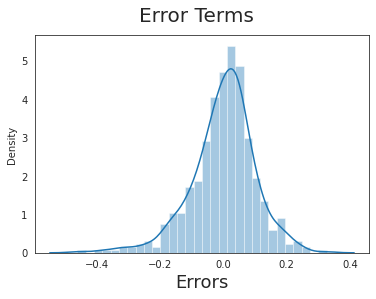

In [1214]:
fig = plt.figure()
sns.distplot(y_train - y_train_price)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

# Making Predictions
Applying scaling on test set

In [1215]:
df_test.shape

(220, 20)

In [1216]:
# scale only numerical variables
numeric_vars = ['temp', 'atemp', 'humidity', 'windspeed', 'tot_bike_count']

In [1217]:
dfdf_test_back = df_test

In [1218]:
df_train, df_test = train_test_split(temp_df, train_size=0.7, random_state=100)
df_test.head()

,year,month,holiday,weekday,workingday,temp,atemp,humidity,windspeed,tot_bike_count,summer,fall,winter,Clear,Mist_Cloudy,Light_Snow_Rain,Monday,Tuesday,Wensday,Thursday,Friday,Saturday
184,0,7,1,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,1,0,0,1,0,1,0,0,0,0,0
535,1,6,0,3,1,32.082500,36.04875,59.2083,7.625404,6211,1,0,0,1,0,0,0,0,1,0,0,0
299,0,10,0,4,1,19.270000,22.85230,81.2917,13.250121,2659,0,0,1,0,1,0,0,0,0,1,0,0
221,0,8,0,3,1,31.433347,34.24915,42.4167,13.417286,4780,0,1,0,1,0,0,0,0,1,0,0,0
152,0,6,0,4,1,29.315000,32.19710,30.5000,19.583229,4968,1,0,0,1,0,0,0,0,0,1,0,0


In [1221]:
df_test[numeric_vars] = scaler.transform(df_test[numeric_vars])

In [1222]:
df_test.head()

,year,month,holiday,weekday,workingday,temp,atemp,humidity,windspeed,tot_bike_count,summer,fall,winter,Clear,Mist_Cloudy,Light_Snow_Rain,Monday,Tuesday,Wensday,Thursday,Friday,Saturday
184,0,7,1,1,0,-0.048400,-0.083584,-0.232800,-0.088243,-0.002451,0,1,0,0,1,0,1,0,0,0,0,0
535,1,6,0,3,1,-0.046286,-0.081669,-0.233549,-0.086013,-0.002449,1,0,0,1,0,0,0,0,1,0,0,0
299,0,10,0,4,1,-0.058120,-0.090764,-0.229942,-0.080222,-0.002496,0,0,1,0,1,0,0,0,0,1,0,0
221,0,8,0,3,1,-0.046886,-0.082910,-0.236291,-0.080050,-0.002468,0,1,0,1,0,0,0,0,1,0,0,0
152,0,6,0,4,1,-0.048842,-0.084324,-0.238237,-0.073702,-0.002466,1,0,0,1,0,0,0,0,0,1,0,0


Deviding the X_test and y_test

In [1223]:
back_df_test = df_test

In [1224]:
y_test = df_test.pop('tot_bike_count')
X_test = df_test

In [1225]:
X_test.shape

(220, 21)

In [1229]:
#cols_to_have = [ 'year', 'workingday', 'temp', 'windspeed', 'summer', 'winter',
       'Light_Snow_Rain', 'Saturday']

In [1227]:
cols_to_have1 = ['year', 'workingday', 'windspeed', 'summer', 'fall', 'winter',
       'Light_Snow_Rain', 'Saturday']

In [1237]:
X_test_sm = X_test[cols_to_have1]

In [1238]:
X_test_sm.columns

Index(['year', 'workingday', 'windspeed', 'summer', 'fall', 'winter',
       'Light_Snow_Rain', 'Saturday'],
      dtype='object')

In [1239]:
X_test_sm = sm.add_constant(X_test_sm)

In [1240]:
y_test_pred = lm.predict(X_test_sm)

In [ ]:
r2 = r2_score(y_true = y_test, y_pred=y_test_pred) 
r2

Text(0, 0.5, 'y_test_pred')

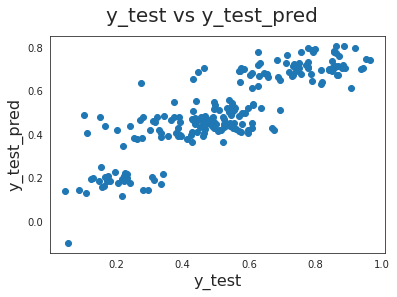

In [1008]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)
plt.xlabel('y_test', fontsize=16)
plt.ylabel('y_test_pred', fontsize=16)